In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
heart_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


C:\Users\latel\AppData\Local\Temp\ipykernel_2764\1813240404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= heart_df["DEATH_EVENT"], palette= cols)


[Text(0, 0, '203')]

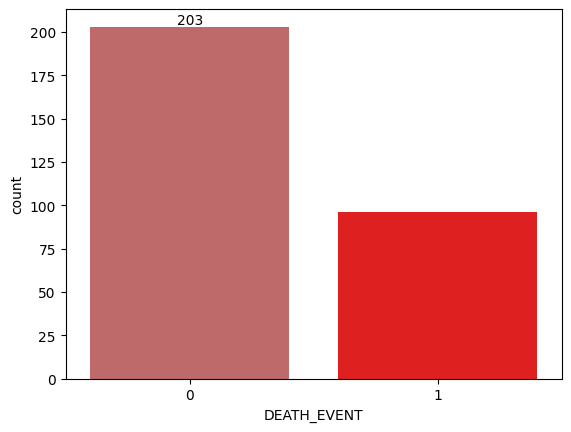

In [4]:
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= heart_df["DEATH_EVENT"], palette= cols)
ax.bar_label(ax.containers[0])

In [5]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: >

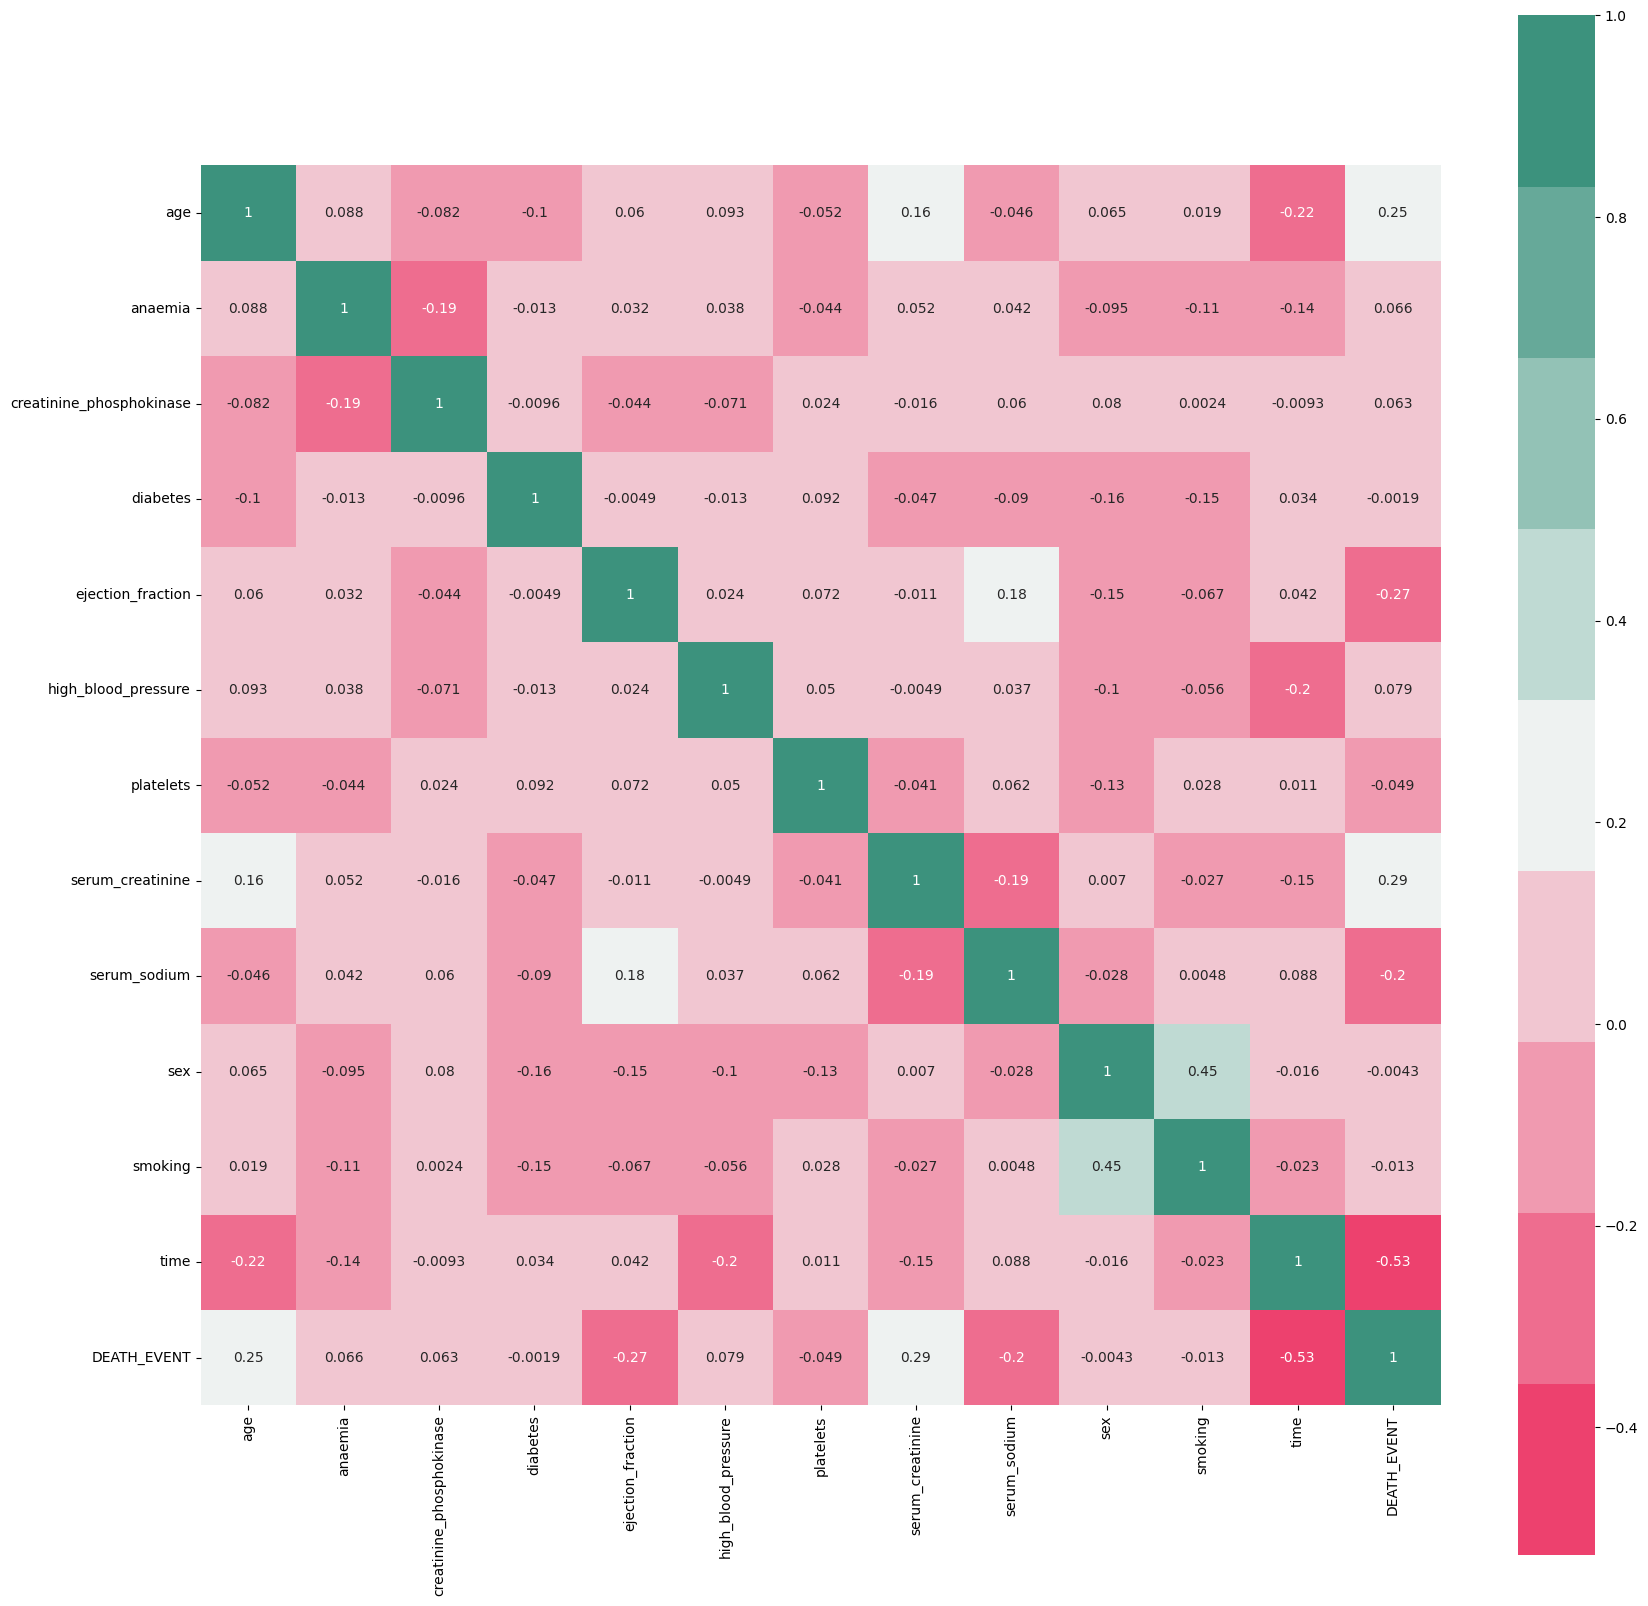

In [6]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = heart_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [7]:
x=heart_df.drop(["DEATH_EVENT"],axis=1)
y=heart_df["DEATH_EVENT"]

In [8]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 0)

In [9]:
sns.__version__

'0.13.0'

In [10]:
model=SVC()

In [11]:
model.fit(x_train, y_train)

SVC()

In [12]:
pred=model.predict(x_test)

In [13]:
print(confusion_matrix(y_test,pred))

[[37  0]
 [23  0]]


In [14]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        37
           1       0.00      0.00      0.00        23

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60



c:\Users\latel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\latel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\latel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Scaled

In [15]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
x_scaled = scaler.transform(x)
heart_df_scaled = pd.DataFrame(x_scaled)
heart_df_scaled["DEATH_EVENT"] = y
heart_df_scaled.columns = heart_df.columns
heart_df_scaled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.195464,-0.892744,0.011303,-0.840918,-1.564971,1.309927,-0.031474,0.604930,-1.434707,0.736163,-0.682831,-1.628594,1
1,-0.501522,-0.892744,7.431409,-0.840918,0.021014,-0.763401,-0.048050,-0.270440,-0.127611,0.736163,-0.682831,-1.602689,1
2,0.346971,-0.892744,-0.433149,-0.840918,-1.564971,-0.763401,-1.071223,-0.051597,-1.652557,0.736163,1.464492,-1.589737,1
3,-0.925769,1.120142,-0.468828,-0.840918,-1.564971,-0.763401,-0.586680,0.604930,0.090239,0.736163,-0.682831,-1.589737,1
4,0.346971,1.120142,-0.418878,1.189177,-1.564971,-0.763401,0.594394,1.480300,-4.484599,-1.358395,-0.682831,-1.576784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.092423,-0.892744,-0.519797,1.189177,0.021014,1.309927,-1.141886,-0.270440,1.397336,0.736163,1.464492,1.816757,0
295,-0.501522,-0.892744,1.273302,-0.840918,0.021014,-0.763401,0.018999,-0.161019,0.525938,-1.358395,-0.682831,1.829709,0
296,-1.350015,-0.892744,1.517954,1.189177,1.959440,-0.763401,4.783674,-0.598704,0.308088,-1.358395,-0.682831,1.920376,0
297,-1.350015,-0.892744,1.877797,-0.840918,0.021014,-0.763401,-1.293306,0.057824,0.743787,0.736163,1.464492,1.946281,0


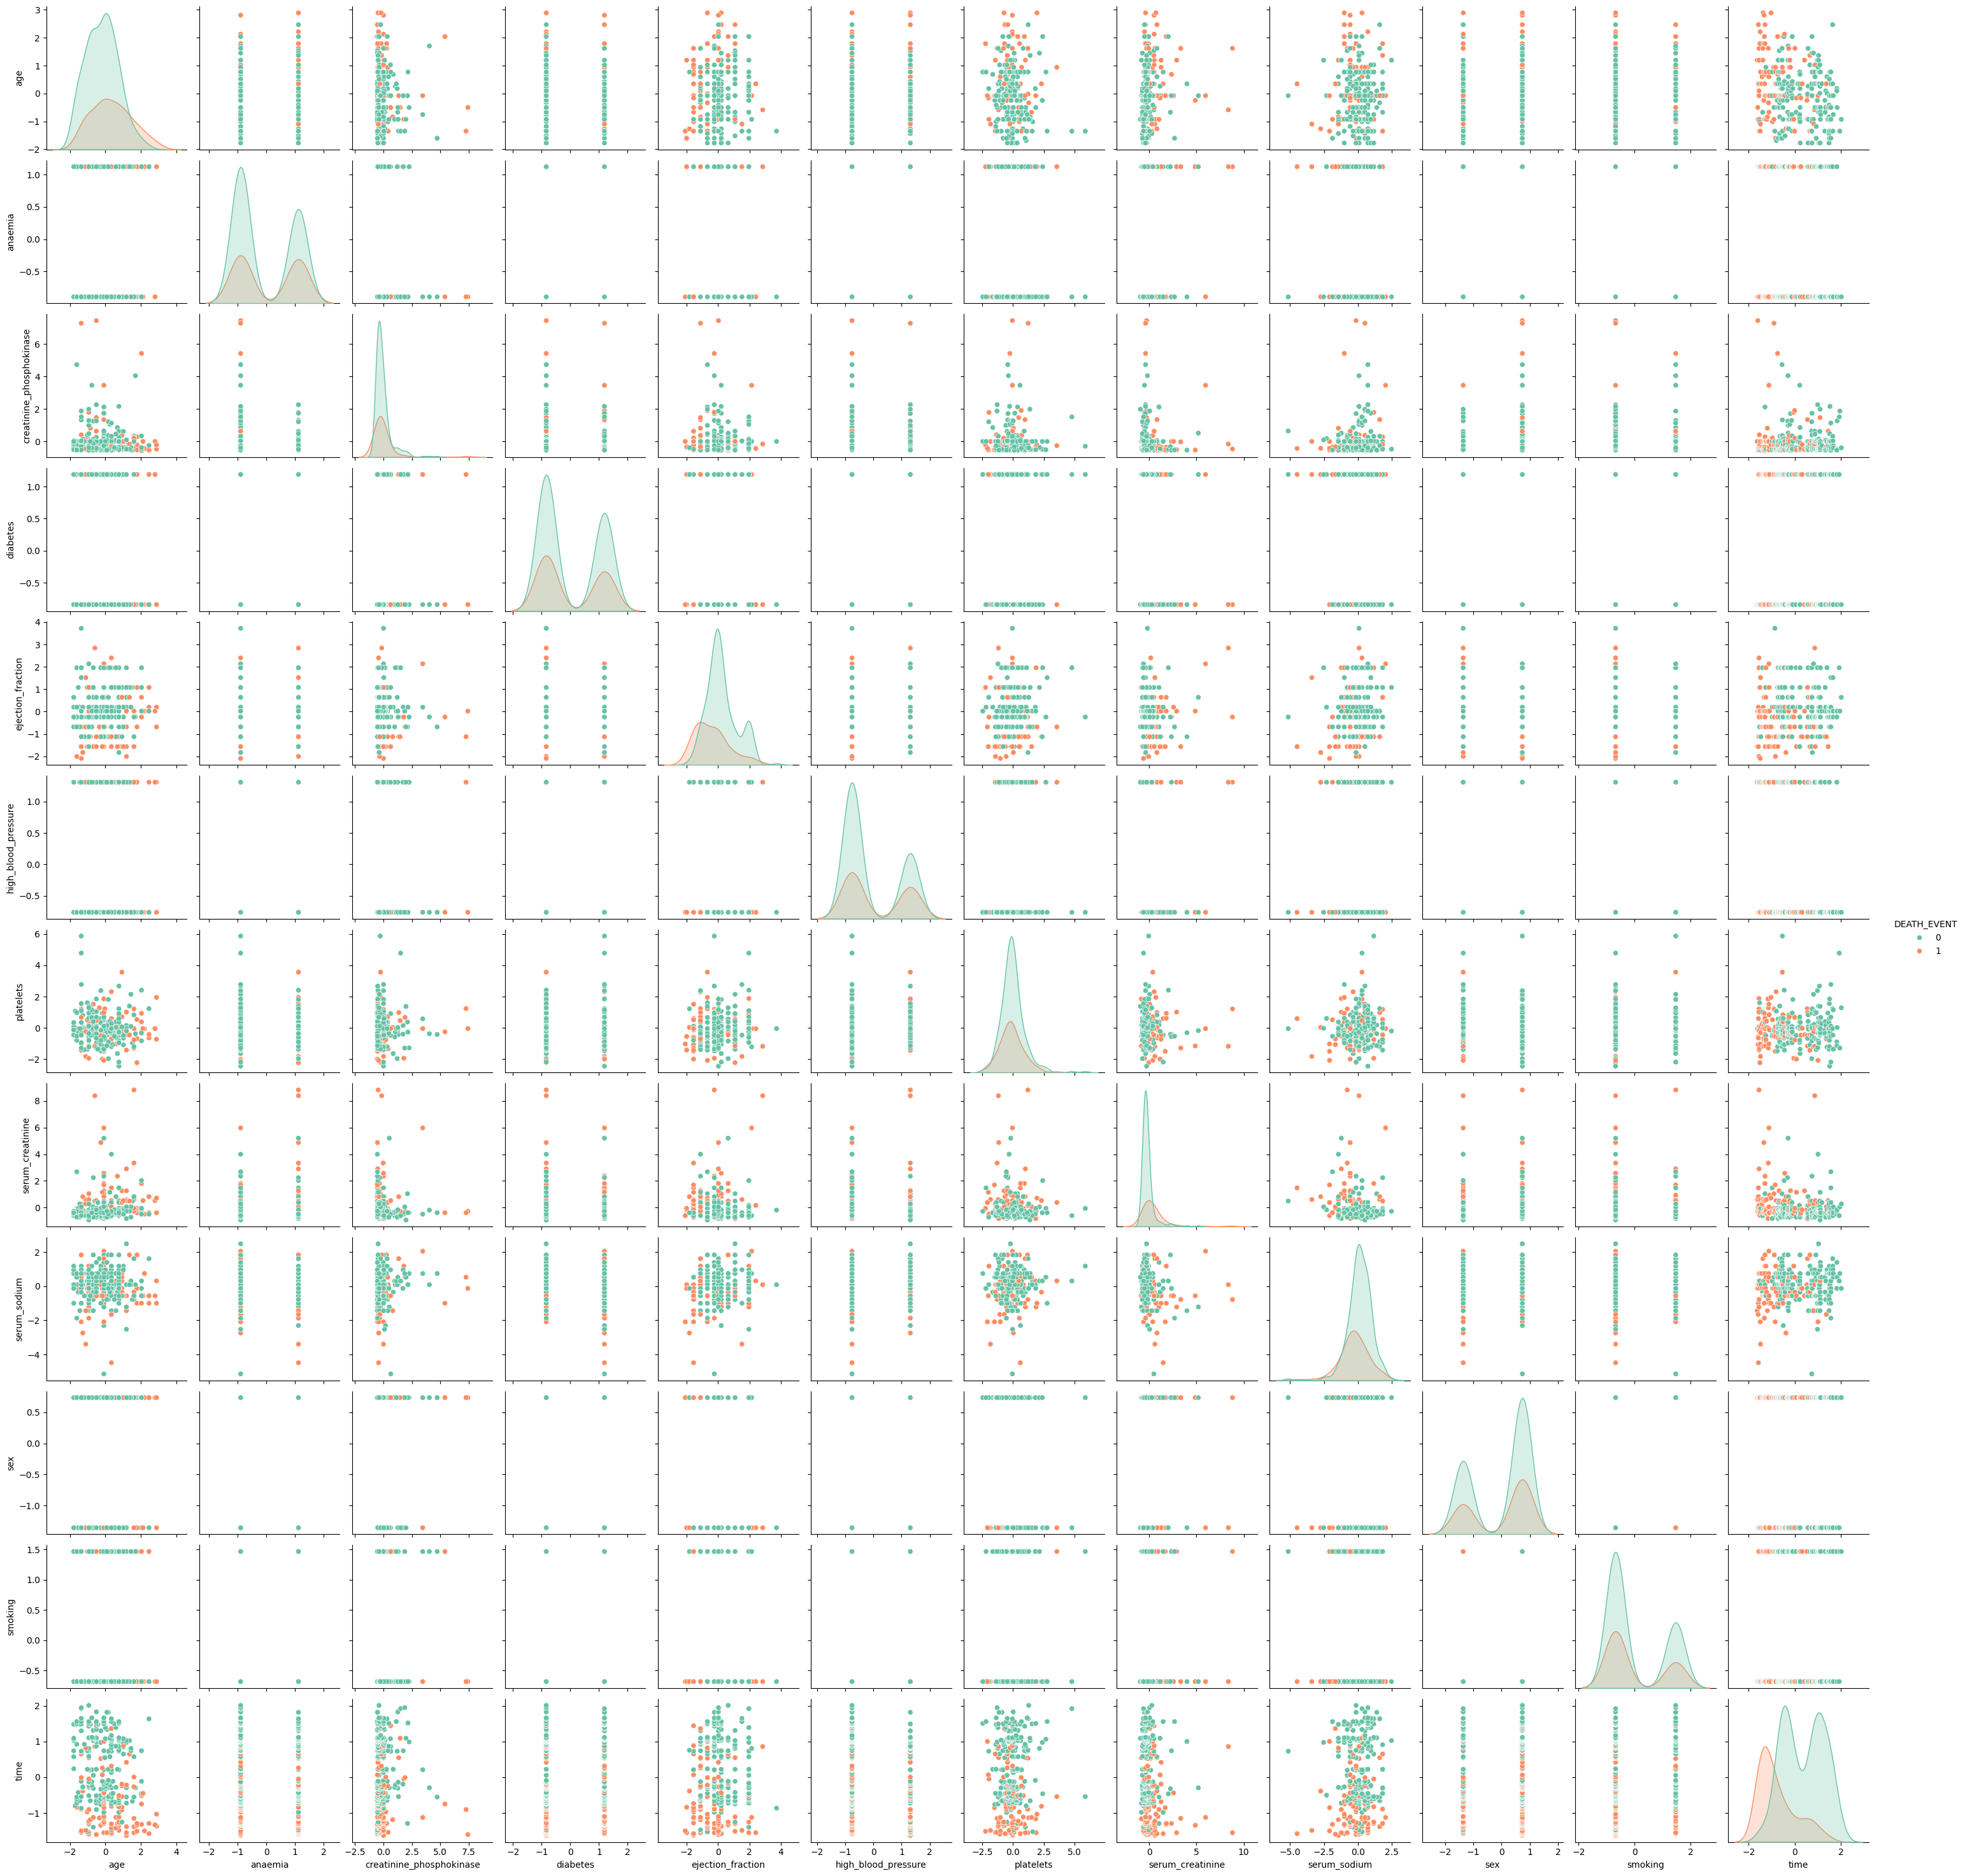

In [17]:
sns.pairplot(data=heart_df_scaled, hue='DEATH_EVENT', palette='Set2')

In [18]:
model=SVC(kernel="linear")

In [19]:
model.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [20]:
x_test_scaled = scaler.transform(x_test)

pred=model.predict(x_test_scaled)

In [21]:
print(confusion_matrix(y_test,pred))

[[37  0]
 [12 11]]


<Axes: >

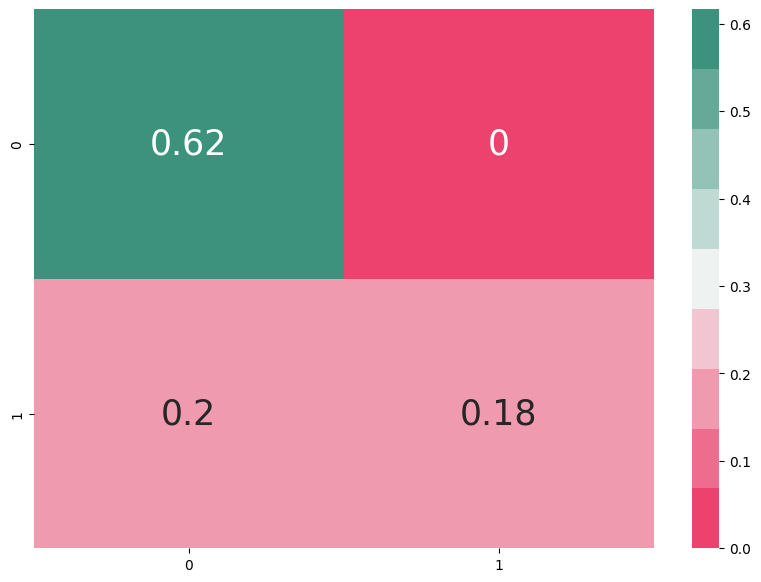

In [22]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        37
           1       1.00      0.48      0.65        23

    accuracy                           0.80        60
   macro avg       0.88      0.74      0.75        60
weighted avg       0.85      0.80      0.78        60



## kNN

In [24]:
split_ratios = [0.9, 0.8, 0.7, 0.6]
k_values = range(1, 6)
results = []

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(heart_df_scaled,heart_df['DEATH_EVENT'],
                                                    test_size=ratio, shuffle = True, random_state = 0)

    for K in k_values:
        knn = KNeighborsClassifier(K)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            'Train/Test Split': f"{round(ratio * 100)}/{round((1 - ratio) * 100)}",
            'K': K,
            'Accuracy Score': accuracy
        })

results_df = pd.DataFrame(results)

print(results_df)

   Train/Test Split  K  Accuracy Score
0             90/10  1        0.692593
1             90/10  2        0.692593
2             90/10  3        0.700000
3             90/10  4        0.692593
4             90/10  5        0.714815
5             80/20  1        0.700000
6             80/20  2        0.729167
7             80/20  3        0.758333
8             80/20  4        0.741667
9             80/20  5        0.787500
10            70/30  1        0.776190
11            70/30  2        0.766667
12            70/30  3        0.790476
13            70/30  4        0.747619
14            70/30  5        0.795238
15            60/40  1        0.766667
16            60/40  2        0.755556
17            60/40  3        0.816667
18            60/40  4        0.755556
19            60/40  5        0.788889


## SVM Linear Loop

In [25]:
X = heart_df.drop(columns=['DEATH_EVENT'])
y = heart_df['DEATH_EVENT']

split_ratios = [0.8]
c_values = [1, 100]
results = []

for test_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=True, random_state=0)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for C in c_values:
        model = SVC(kernel="linear", C=C)
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        
        print(f"Confusion Matrix for C={C} and test ratio={test_ratio}:")
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
        print("\n")


Confusion Matrix for C=1 and test ratio=0.8:
[[122  44]
 [ 15  59]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.81       166
           1       0.57      0.80      0.67        74

    accuracy                           0.75       240
   macro avg       0.73      0.77      0.74       240
weighted avg       0.79      0.75      0.76       240



Confusion Matrix for C=100 and test ratio=0.8:
[[120  46]
 [  9  65]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       166
           1       0.59      0.88      0.70        74

    accuracy                           0.77       240
   macro avg       0.76      0.80      0.76       240
weighted avg       0.82      0.77      0.78       240



